# Resumen
## Modelos testeados:

In [165]:
from IPython.display import Markdown

# Datos
features_dict = {
    'Modelo Predeterminado': ['same_party', 'same_sector', 'same_region', 'sentiment'],
    'Modelo con datos de Grafo': ['common_neighbors', 'closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'coreness_1', 'coreness_2', 'same_comunity', 'same_party', 'same_sector', 'same_region', 'sentiment'],
    'Modelo con solo datos de Grafo': ['common_neighbors', 'closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'coreness_1', 'coreness_2', 'same_comunity', 'sentiment'],
    'Modelo con solo datos tabulares': ['same_party', 'same_sector', 'same_region']
}

# Crear una tabla en formato Markdown
markdown_table = "| Modelo | Features |\n|---------|----------|\n" + \
    "\n".join([f"| {name} | {', '.join(features)} |" for name, features in features_dict.items()])

# Mostrar la tabla en formato Markdown
Markdown(markdown_table)

| Modelo | Features |
|---------|----------|
| Modelo Predeterminado | same_party, same_sector, same_region, sentiment |
| Modelo con datos de Grafo | common_neighbors, closeness_1, closeness_2, betweenness_1, betweenness_2, coreness_1, coreness_2, same_comunity, same_party, same_sector, same_region, sentiment |
| Modelo con solo datos de Grafo | common_neighbors, closeness_1, closeness_2, betweenness_1, betweenness_2, coreness_1, coreness_2, same_comunity, sentiment |
| Modelo con solo datos tabulares | same_party, same_sector, same_region |

## Resultados

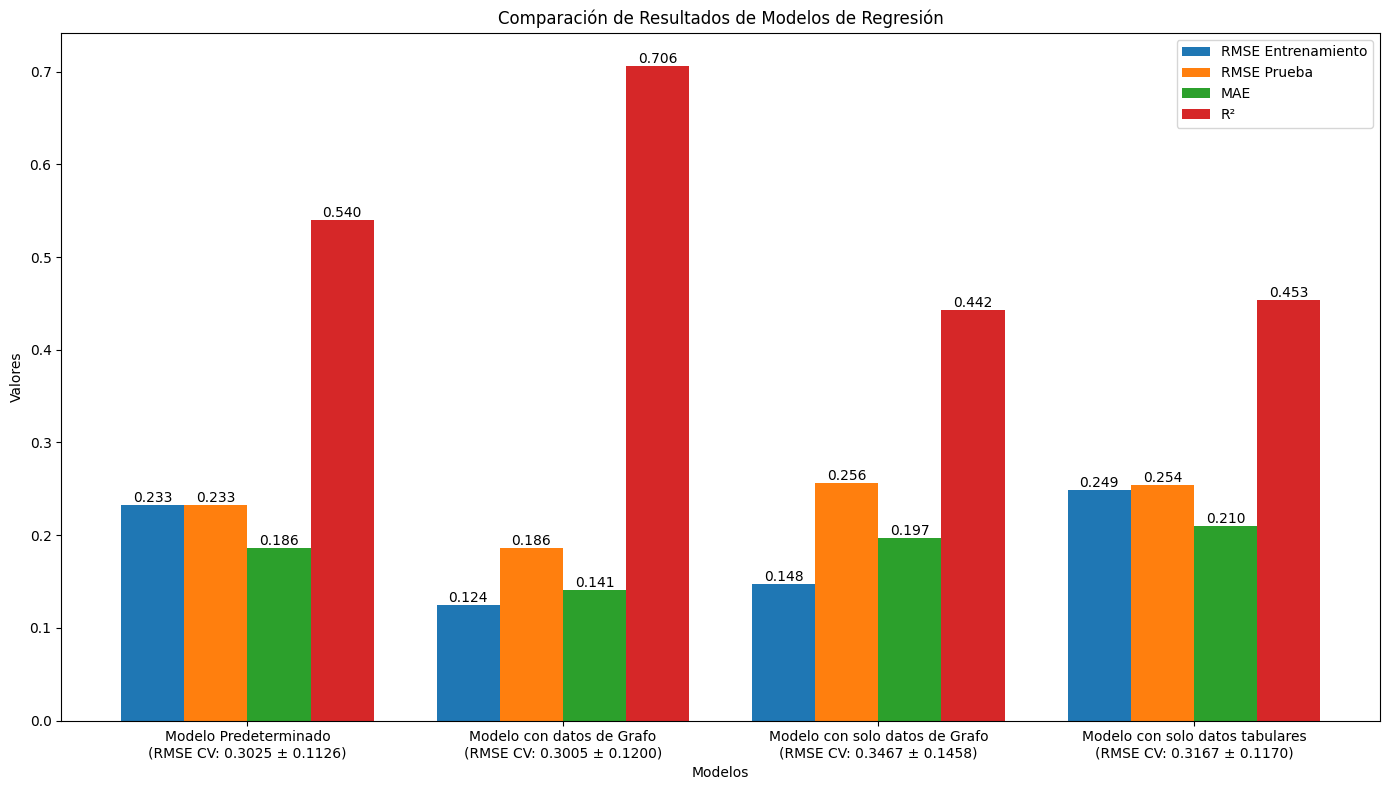

In [166]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de los cuatro modelos
model_names = [
    'Modelo Predeterminado\n(RMSE CV: 0.3025 ± 0.1126)',
    'Modelo con datos de Grafo\n(RMSE CV: 0.3005 ± 0.1200)',
    'Modelo con solo datos de Grafo\n(RMSE CV: 0.3467 ± 0.1458)',
    'Modelo con solo datos tabulares\n(RMSE CV: 0.3167 ± 0.1170)'
]

rmse_train = [0.23280579058976555, 0.12419426490303488, 0.14771876012645982, 0.24875635848082472]
rmse_test = [0.23274316537310588, 0.18596390007067773, 0.2563142527774752, 0.2538466128966913]
mae = [0.1864668693801699, 0.1409883452613345, 0.19693420748602194, 0.20960425400492208]
r2 = [0.5402498979048536, 0.706488411616479, 0.4424119285374485, 0.4530964944524758]

x = np.arange(len(model_names))  # La posición de las etiquetas en el eje x

# Ancho de las barras
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))

# Crear las barras
bar1 = ax.bar(x - 1.5*width, rmse_train, width, label='RMSE Entrenamiento')
bar2 = ax.bar(x - width/2, rmse_test, width, label='RMSE Prueba')
bar3 = ax.bar(x + width/2, mae, width, label='MAE')
bar4 = ax.bar(x + 1.5*width, r2, width, label='R²')

# Añadir etiquetas y título
ax.set_xlabel('Modelos')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Resultados de Modelos de Regresión')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Añadir los valores arriba de las barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.3f}',
            ha='center',
            va='bottom'
        )

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)
add_value_labels(bar4)

# Mostrar la gráfica
plt.tight_layout()
plt.savefig('comparacion_modelos_ampliado.png')  # Guardar la imagen
plt.show()


# Modelo Predeterminado vs Modelo agregando más datos de Grafo

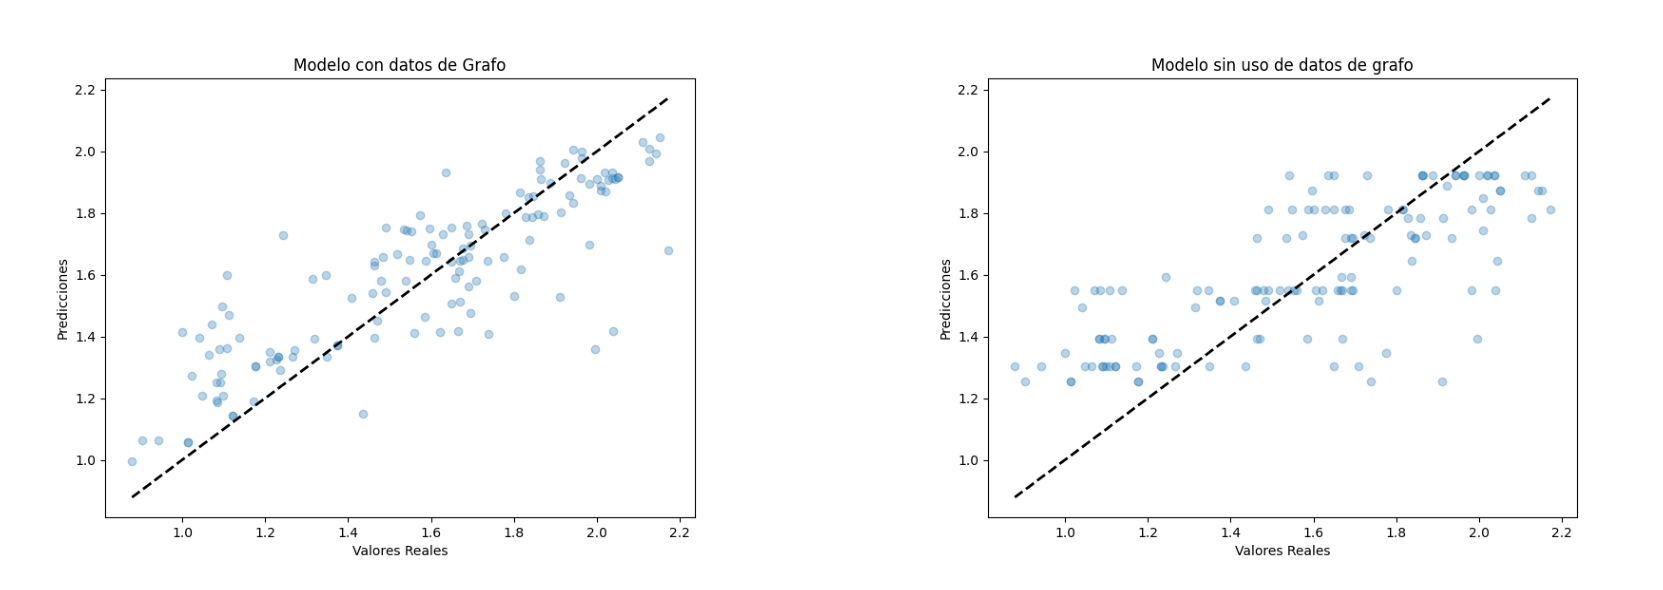

In [168]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes
img1 = mpimg.imread('grafico_dispersión_modelo_graph.png')
img2 = mpimg.imread('grafico_dispersión_modelo_sin_graph.png')

fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Ajusta el tamaño de la figura según necesites

# Mostrar las imágenes
axs[0].imshow(img1)
axs[0].axis('off')  # Ocultar los ejes

axs[1].imshow(img2)
axs[1].axis('off')  # Ocultar los ejes
plt.tight_layout()


plt.show()

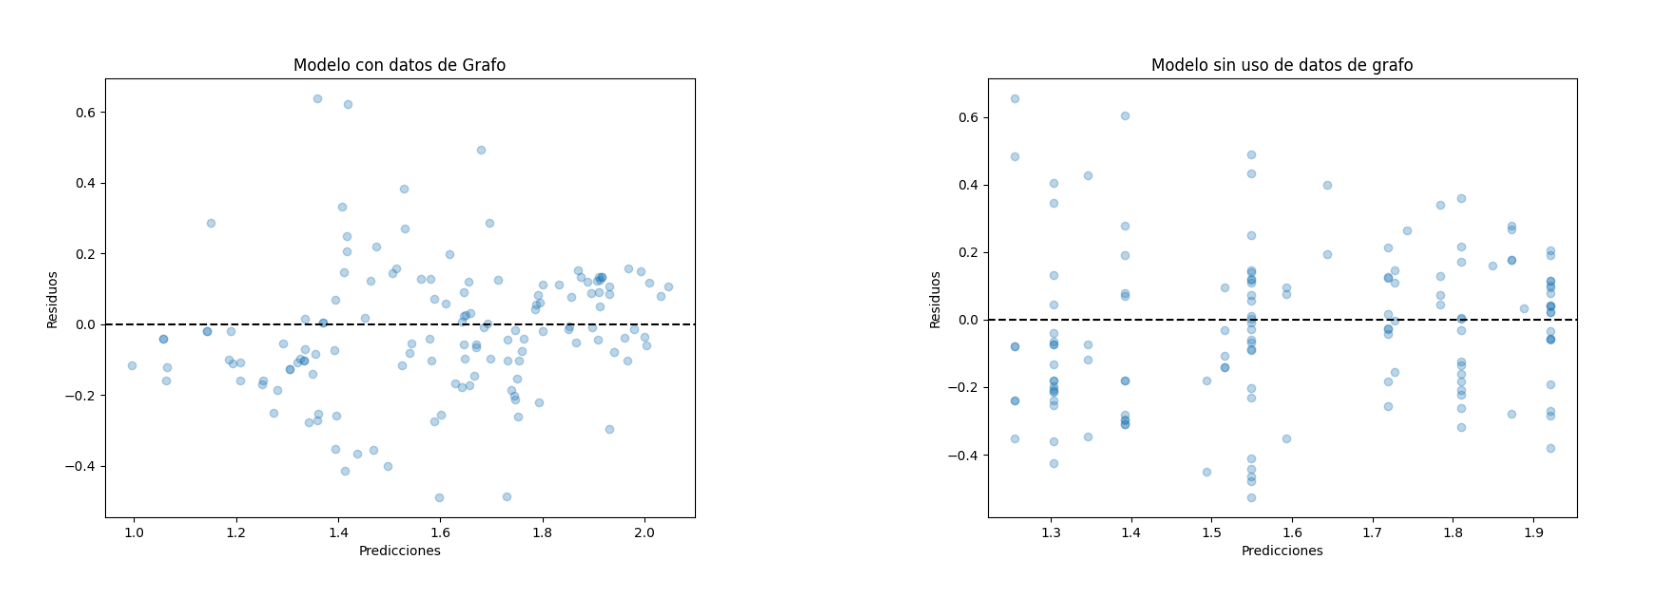

In [169]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes
img1 = mpimg.imread('grafico_residuos_modelo_graph.png')
img2 = mpimg.imread('grafico_residuos_modelo_sin_graph.png')

fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Ajusta el tamaño de la figura según necesites

# Mostrar las imágenes
axs[0].imshow(img1)
axs[0].axis('off')  # Ocultar los ejes

axs[1].imshow(img2)
axs[1].axis('off')  # Ocultar los ejes
plt.tight_layout()


plt.show()


# Resto del notebook

In [1]:
import pandas as pd
import numpy as np

In [2]:
# filtered_edgelist_df = pd.read_csv('final_edgelist.csv')
filtered_edgelist_df = pd.read_csv('final_edgelist_gpt_o_mini_lista_cerrada_graph_machinelearning_V3.csv')
print('Full edgelist len:', len(filtered_edgelist_df))
print('Liinked edgelist len:', len(filtered_edgelist_df[filtered_edgelist_df['sentiment'] != 'no_link_found']))
filtered_edgelist_df.sample(2)

Full edgelist len: 687
Liinked edgelist len: 687


,parliamentarian_1,parliamentarian_2,proportion_agreement,region_1,region_2,partido_1,partido_2,Diputado_1,Diputado_2,sector_1,...,page_rank_2,betweenness_1,betweenness_2,closeness_1,closeness_2,eigenvector_1,eigenvector_2,common_neighbors,influence_domain_size_1,influence_domain_size_2
492,"Cariola, Karol","Sagardia, Clara",1.830040,Región Metropolitana de Santiago (47),Región del Biobío (13),PCCh,Ind-CS,Karol Cariola Oliva,Clara Sagardia Cabezas,izquierda,...,0.001742,0.072905,0.003629,0.280347,0.209251,0.228653,0.038172,5.0,604.0,604.0
410,"Sagardia, Clara","Soto, Raul",1.737813,Región del Biobío (13),Región del Libertador General Bernardo O'Higgi...,Ind-CS,PPD,Clara Sagardia Cabezas,Raul Soto Mardones,izquierda,...,0.006627,0.003629,0.025762,0.209251,0.249584,0.038172,0.117876,3.0,604.0,604.0


In [ ]:
filtered_edgelist_df

In [4]:
# Similitud de partido (1 si son del mismo partido, 0 si no)
filtered_edgelist_df['same_party'] = (filtered_edgelist_df['partido_1'] == filtered_edgelist_df['partido_2']).astype(int)

# Similitud de sector político (1 si es el mismo sector, 0 si no)
filtered_edgelist_df['same_sector'] = (filtered_edgelist_df['sector_1'] == filtered_edgelist_df['sector_2']).astype(int)

# Similitud de región (1 si es la misma región, 0 si no)
filtered_edgelist_df['same_region'] = (filtered_edgelist_df['region_1'] == filtered_edgelist_df['region_2']).astype(int)

filtered_edgelist_df['same_cluster'] = (filtered_edgelist_df['cluster_1'] == filtered_edgelist_df['cluster_2']).astype(int)

filtered_edgelist_df['same_comunity'] = (filtered_edgelist_df['community_1'] == filtered_edgelist_df['community_2']).astype(int)


In [5]:
filtered_edgelist_df

,parliamentarian_1,parliamentarian_2,proportion_agreement,region_1,region_2,partido_1,partido_2,Diputado_1,Diputado_2,sector_1,...,eigenvector_1,eigenvector_2,common_neighbors,influence_domain_size_1,influence_domain_size_2,same_party,same_sector,same_region,same_cluster,same_comunity
0,"Barchiesi, Chiara","Castillo, Nathalie",0.876153,Región de Valparaíso (16),Región de Coquimbo (7),PLR,PCCh,Chiara Barchiesi Chavez,Nathalie Castillo Rojas,derecha,...,0.021665,0.063565,2.0,604.0,604.0,0,0,0,0,0
1,"Barchiesi, Chiara","Pizarro, Lorena",0.878788,Región de Valparaíso (16),Región Metropolitana de Santiago (47),PLR,PCCh,Chiara Barchiesi Chavez,Lorena Pizarro Sierra,derecha,...,0.021665,0.067971,2.0,604.0,604.0,0,0,0,1,0
2,"Barchiesi, Chiara","Pizarro, Lorena",0.878788,Región de Valparaíso (16),Región Metropolitana de Santiago (47),PLR,PCCh,Chiara Barchiesi Chavez,Lorena Pizarro Sierra,derecha,...,0.021665,0.067971,2.0,604.0,604.0,0,0,0,1,0
3,"Barchiesi, Chiara","Pizarro, Lorena",0.878788,Región de Valparaíso (16),Región Metropolitana de Santiago (47),PLR,PCCh,Chiara Barchiesi Chavez,Lorena Pizarro Sierra,derecha,...,0.021665,0.067971,2.0,604.0,604.0,0,0,0,1,0
4,"Kaiser, Johannes","Pizarro, Lorena",0.886693,Región Metropolitana de Santiago (47),Región Metropolitana de Santiago (47),PLR,PCCh,Johannes Kaiser Barents-Von Hohenhagen,Lorena Pizarro Sierra,derecha,...,0.086444,0.067971,7.0,604.0,604.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,"Becker, Miguel Angel","Rathgeb, Jorge",2.151515,Región de la Araucanía (11),Región de la Araucanía (11),RN,RN,Miguel Becker Alvear,Jorge Rathgeb Schifferli,centro_derecha,...,0.013930,0.015628,4.0,604.0,604.0,1,1,1,1,1
683,"Rojas, Camila","Schneider, Emilia",2.171278,Región de Valparaíso (16),Región Metropolitana de Santiago (47),Comunes,CS,Camila Rojas Valderrama,Emilia Schneider Videla,izquierda,...,0.019404,0.069634,2.0,604.0,604.0,0,1,0,0,1
684,"Cicardini, Daniella","Manouchehri, Daniel",2.179183,Región de Atacama (5),Región de Coquimbo (7),PS,PS,Daniella Cicardini Milla,Daniel Manouchehri Moghadam Kashan Lobos,centro_izquierda,...,0.023192,0.026860,4.0,604.0,604.0,1,1,0,1,1
685,"Cicardini, Daniella","Manouchehri, Daniel",2.179183,Región de Atacama (5),Región de Coquimbo (7),PS,PS,Daniella Cicardini Milla,Daniel Manouchehri Moghadam Kashan Lobos,centro_izquierda,...,0.023192,0.026860,4.0,604.0,604.0,1,1,0,1,1


In [ ]:
# filtered_edgelist_df.rename(columns={'label': 'edge'}, inplace=True)


In [6]:
# Crear un diccionario de mapeo
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}

# Reemplazar los valores en la columna 'sentiment'
filtered_edgelist_df['sentiment'] = filtered_edgelist_df['sentiment'].map(sentiment_mapping)

# Verificar el resultado
print(filtered_edgelist_df['sentiment'].value_counts())


sentiment
 1    412
-1    147
 0    128
Name: count, dtype: int64


In [85]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Regresión sin métricas de grafo solo sentiment

In [170]:
datos = filtered_edgelist_df[['proportion_agreement','same_party', 'same_sector', 'same_region', 'sentiment']]
# X: Conjunto de características (todas las columnas que has calculado)
# y: Variable objetivo (proportion_agreement)


X = datos[['same_party', 'same_sector', 'same_region', 'sentiment']]
y = datos['proportion_agreement']



In [171]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', subsample= 0.8, colsample_bytree=0.7, learning_rate=0.1,
                          max_depth=5, alpha=1, n_estimators=100, min_child_weight=4, gamma=0)

xg_reg.fit(X_train, y_train)


# Predecir en el conjunto de entrenamiento
y_train_pred = xg_reg.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Predecir en el conjunto de validación/prueba
y_test_pred = xg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE Entrenamiento: {train_rmse}")
print(f"RMSE Prueba: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE Entrenamiento: 0.23280579058976555
RMSE Prueba: 0.23274316537310588
MAE: 0.1864668693801699
R²: 0.5402498979048536


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


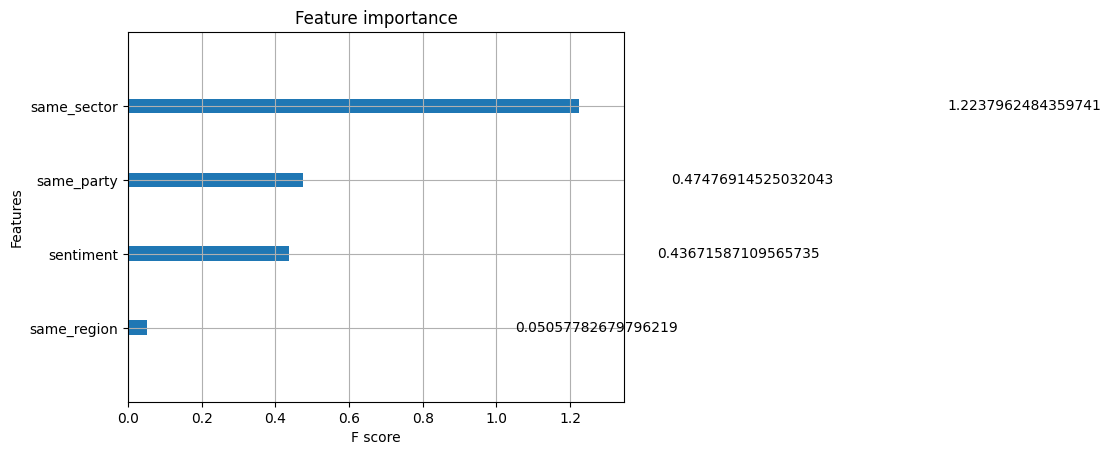

In [172]:
xgb.plot_importance(xg_reg, importance_type='gain', max_num_features=10)  
plt.show()

In [200]:
# Configuración del modelo XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definición ampliada de los hiperparámetros para probar
param_distributions = {
    'max_depth': [3, 5, 7, 9, 12, 15, 20, 25, 30],
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5, 1.0, 1.5],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7],
    'alpha': [0, 1, 5, 10, 15, 20]
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=xg_reg, 
    param_distributions=param_distributions, 
    n_iter=200, 
    scoring='r2', 
    cv=5, 
    verbose=1, 
    random_state=42
)

random_search.fit(X_train, y_train)

results = random_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'params': results['params']
})

results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Imprimir los resultados ordenados
for index, row in results_df.iterrows():
    print(f"Score (R^2): {row['mean_test_score']:.4f}, Hiperparámetros: {row['params']}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Score (R^2): 0.4479, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.9, 'alpha': 0}
Score (R^2): 0.4471, Hiperparámetros: {'subsample': 0.5, 'n_estimators': 700, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.9, 'alpha': 1}
Score (R^2): 0.4466, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 600, 'min_child_weight': 4, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1}
Score (R^2): 0.4459, Hiperparámetros: {'subsample': 1.0, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1}
Score (R^2): 0.4458, Hiperparámetros: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 15, 'learning_rate': 0.4, 'gamma': 0, 'colsample_bytree': 0.9, 

In [173]:
from sklearn.model_selection import cross_val_score
# Validación cruzada
cv_scores = cross_val_score(xg_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir scores negativos a positivos y calcular el RMSE
cv_rmse = np.sqrt(-cv_scores)

print(f"RMSE de Validación Cruzada: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

RMSE de Validación Cruzada: 0.3025 ± 0.1126


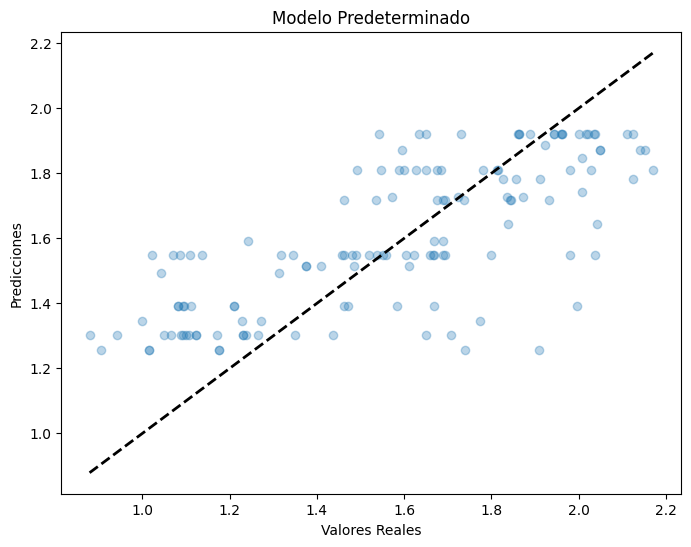

In [174]:
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_test_pred = xg_reg.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Modelo Predeterminado')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal
plt.savefig('grafico_dispersión_modelo_sin_graph.png')  # Guardar la imagen

plt.show()


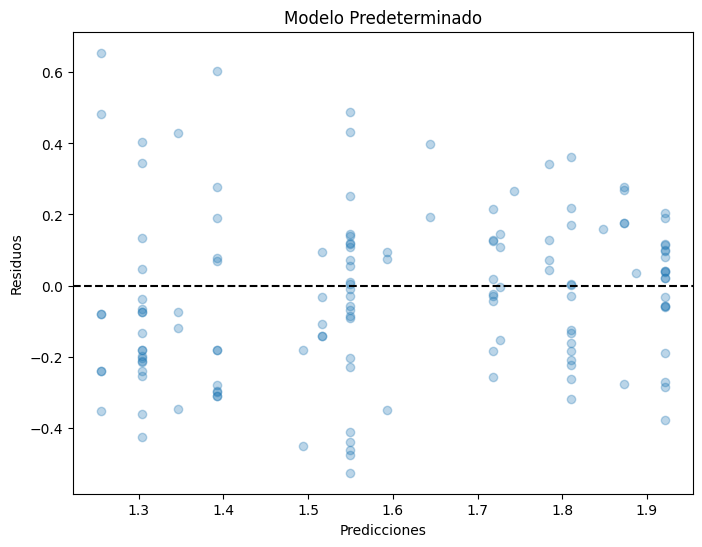

In [175]:
# Calcular residuos
residuals = y_test - y_test_pred

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Modelo Predeterminado')

plt.axhline(y=0, color='k', linestyle='--')  # Línea horizontal en 0
plt.savefig('grafico_residuos_modelo_sin_graph.png')  # Guardar la imagen

plt.show()


# Feature Selection

In [96]:
data = filtered_edgelist_df[['proportion_agreement','eigenvector_1', 'eigenvector_2', 'common_neighbors', 'closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'page_rank_1', 'page_rank_2', 'same_cluster','in_degree_1', 'out_degree_1', 'in_degree_2', 'out_degree_2', 'coreness_1', 'coreness_2', 'same_comunity', 'same_party', 'same_sector', 'same_region', 'sentiment']]


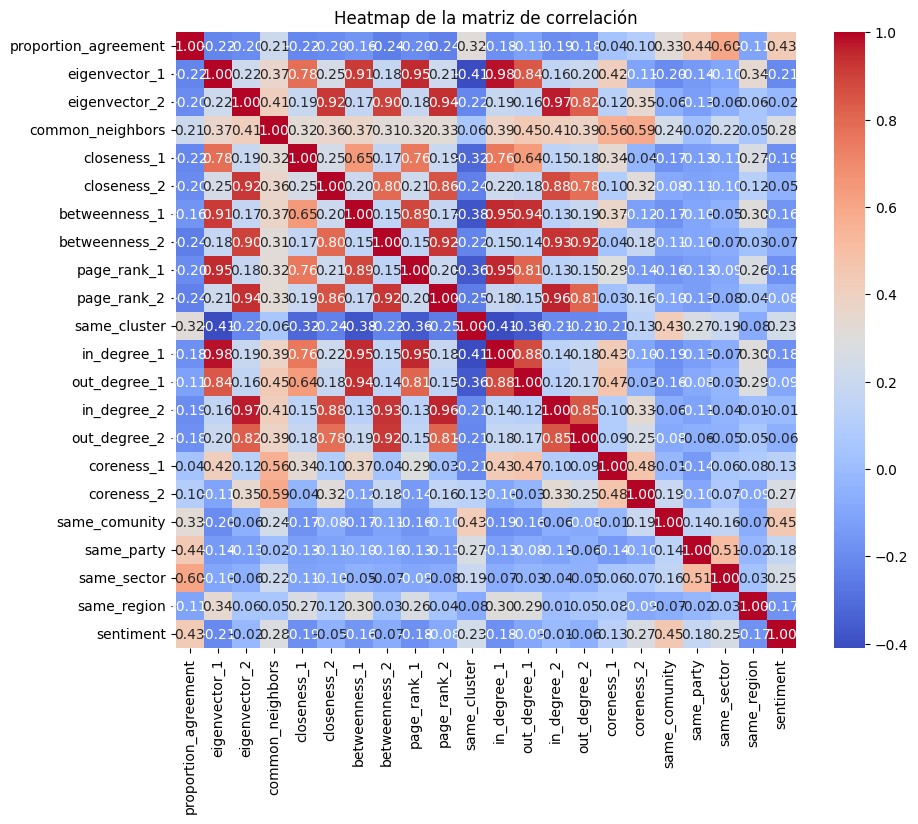

In [97]:

# Matriz de correlación para todas las características
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la matriz de correlación')
plt.show()


In [98]:

correlation_matrix = data.corr()

abs_correlation_matrix = correlation_matrix.abs()

for i in range(len(abs_correlation_matrix)):
    abs_correlation_matrix.iloc[i, i] = 0

top_correlations = abs_correlation_matrix.unstack().sort_values(ascending=False)

print("Las correlaciones más altas:")
print(top_correlations.head(20))


Las correlaciones más altas:
eigenvector_1  in_degree_1      0.978536
in_degree_1    eigenvector_1    0.978536
eigenvector_2  in_degree_2      0.970053
in_degree_2    eigenvector_2    0.970053
page_rank_2    in_degree_2      0.959725
in_degree_2    page_rank_2      0.959725
page_rank_1    in_degree_1      0.950728
in_degree_1    page_rank_1      0.950728
betweenness_1  in_degree_1      0.947163
in_degree_1    betweenness_1    0.947163
eigenvector_1  page_rank_1      0.945679
page_rank_1    eigenvector_1    0.945679
out_degree_1   betweenness_1    0.938868
betweenness_1  out_degree_1     0.938868
eigenvector_2  page_rank_2      0.935363
page_rank_2    eigenvector_2    0.935363
in_degree_2    betweenness_2    0.931510
betweenness_2  in_degree_2      0.931510
page_rank_2    betweenness_2    0.923653
betweenness_2  page_rank_2      0.923653
dtype: float64


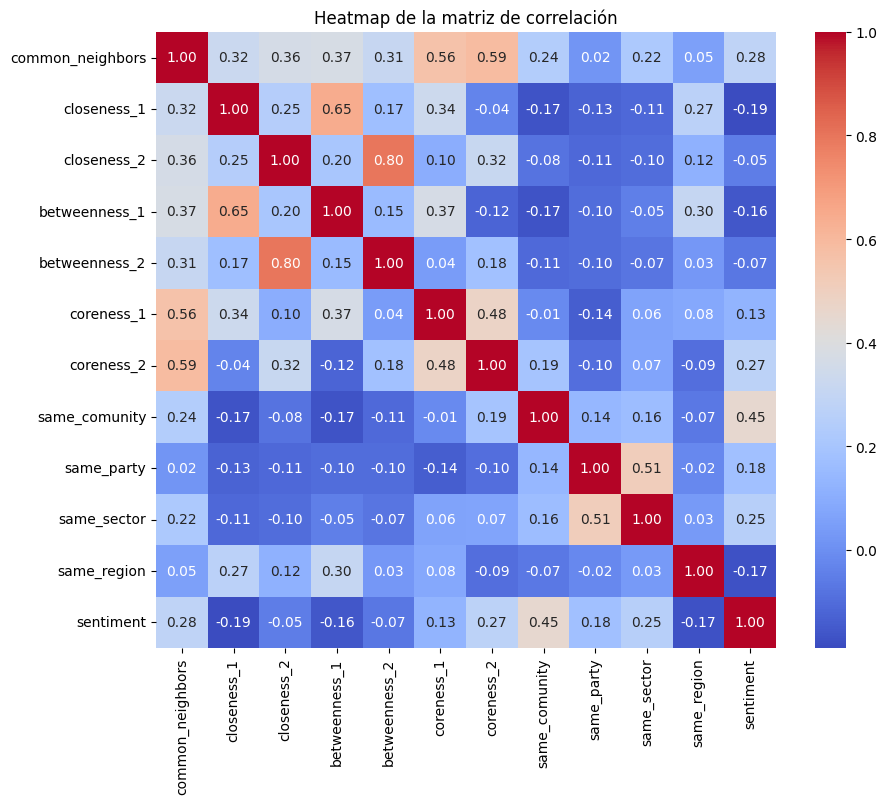

In [99]:

X2 = filtered_edgelist_df[['common_neighbors', 'closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'coreness_1', 'coreness_2', 'same_comunity', 'same_party', 'same_sector', 'same_region', 'sentiment']]

# Matriz de correlación para todas las características
correlation_matrix = X2.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la matriz de correlación')
plt.show()

# Regresión con métricas de grafo

In [136]:

X = filtered_edgelist_df[['common_neighbors', 'closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'coreness_1', 'coreness_2', 'same_comunity', 'same_party', 'same_sector', 'same_region', 'sentiment']]
#'eigenvector_1', 'eigenvector_2',
y = data['proportion_agreement']


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', subsample= 0.8, colsample_bytree=0.7, learning_rate=0.1,
                          max_depth=5, alpha=1, n_estimators=100, min_child_weight=4, gamma=0)

xg_reg.fit(X_train, y_train)


# Predecir en el conjunto de entrenamiento
y_train_pred = xg_reg.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Predecir en el conjunto de validación/prueba
y_test_pred = xg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE Entrenamiento: {train_rmse}")
print(f"RMSE Prueba: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE Entrenamiento: 0.12419426490303488
RMSE Prueba: 0.18596390007067773
MAE: 0.1409883452613345
R²: 0.706488411616479


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


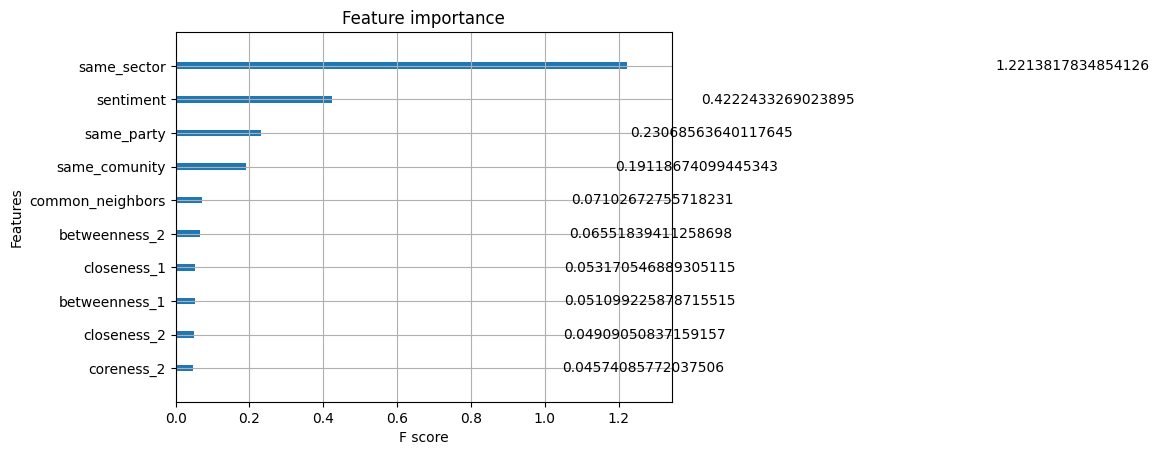

In [138]:
xgb.plot_importance(xg_reg, importance_type='gain', max_num_features=10)  
plt.show() #El aumento promedio en la métrica de rendimiento que se obtiene al usar una característica.

In [139]:
from sklearn.model_selection import cross_val_score
# Validación cruzada
cv_scores = cross_val_score(xg_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir scores negativos a positivos y calcular el RMSE
cv_rmse = np.sqrt(-cv_scores)

print(f"RMSE de Validación Cruzada: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

RMSE de Validación Cruzada: 0.3005 ± 0.1200


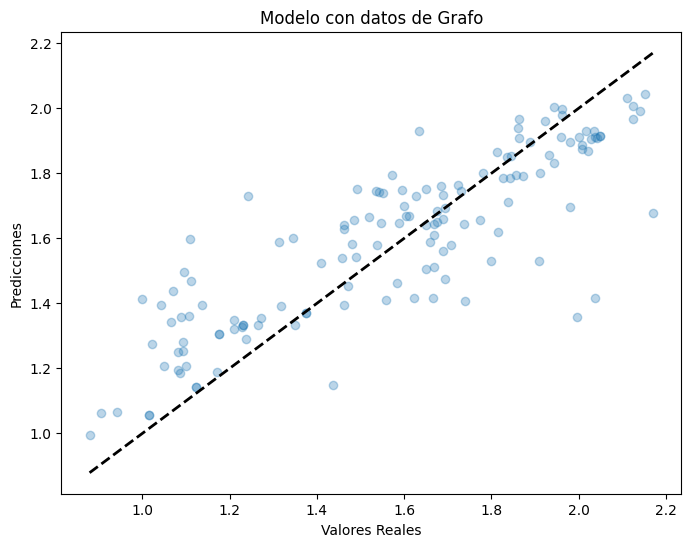

In [140]:
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_test_pred = xg_reg.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Modelo con datos de Grafo')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal
plt.savefig('grafico_dispersión_modelo_graph.png')  # Guardar la imagen

plt.show()

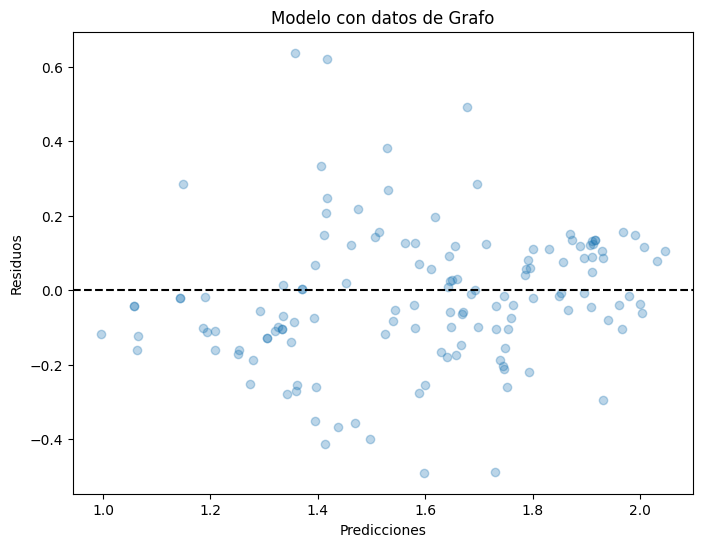

In [141]:
# Calcular residuos
residuals = y_test - y_test_pred

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Modelo con datos de Grafo')
plt.axhline(y=0, color='k', linestyle='--')  # Línea horizontal en 0

plt.savefig('grafico_residuos_modelo_graph.png')  # Guardar la imagen

plt.show()


In [107]:

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definición ampliada de los hiperparámetros para probar
param_distributions = {
    'max_depth': [3, 5, 7, 9, 12, 15, 20, 25, 30],
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5, 1.0, 1.5],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7],
    'alpha': [0, 1, 5, 10, 15, 20]
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=xg_reg, 
    param_distributions=param_distributions, 
    n_iter=200, 
    scoring='r2',  
    cv=5, 
    verbose=1, 
    random_state=42
)

random_search.fit(X_train, y_train)

results = random_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'params': results['params']
})

# Ordenar el DataFrame por 'mean_test_score' en orden descendente
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Imprimir los resultados ordenados
for index, row in results_df.iterrows():
    print(f"Score (R^2): {row['mean_test_score']:.4f}, Hiperparámetros: {row['params']}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Score (R^2): 0.6510, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 600, 'min_child_weight': 4, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1}
Score (R^2): 0.6488, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 4, 'max_depth': 30, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': 1}
Score (R^2): 0.6376, Hiperparámetros: {'subsample': 1.0, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1}
Score (R^2): 0.6348, Hiperparámetros: {'subsample': 0.5, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': 1}
Score (R^2): 0.6328, Hiperparámetros: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': 0}
Score (R^2): 0.6211, Hiperparámetros: {'subsample': 1.

# Solo datos de grafo


In [142]:

X = filtered_edgelist_df[['common_neighbors', 'closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'coreness_1', 'coreness_2', 'same_comunity','sentiment']]
#'eigenvector_1', 'eigenvector_2',
y = data['proportion_agreement']


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', subsample= 0.8, colsample_bytree=0.7, learning_rate=0.1,
                          max_depth=5, alpha=1, n_estimators=100, min_child_weight=4, gamma=0)

xg_reg.fit(X_train, y_train)


# Predecir en el conjunto de entrenamiento
y_train_pred = xg_reg.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Predecir en el conjunto de validación/prueba
y_test_pred = xg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE Entrenamiento: {train_rmse}")
print(f"RMSE Prueba: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE Entrenamiento: 0.14771876012645982
RMSE Prueba: 0.2563142527774752
MAE: 0.19693420748602194
R²: 0.4424119285374485


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [144]:
from sklearn.model_selection import cross_val_score
# Validación cruzada
cv_scores = cross_val_score(xg_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir scores negativos a positivos y calcular el RMSE
cv_rmse = np.sqrt(-cv_scores)

print(f"RMSE de Validación Cruzada: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

RMSE de Validación Cruzada: 0.3467 ± 0.1458


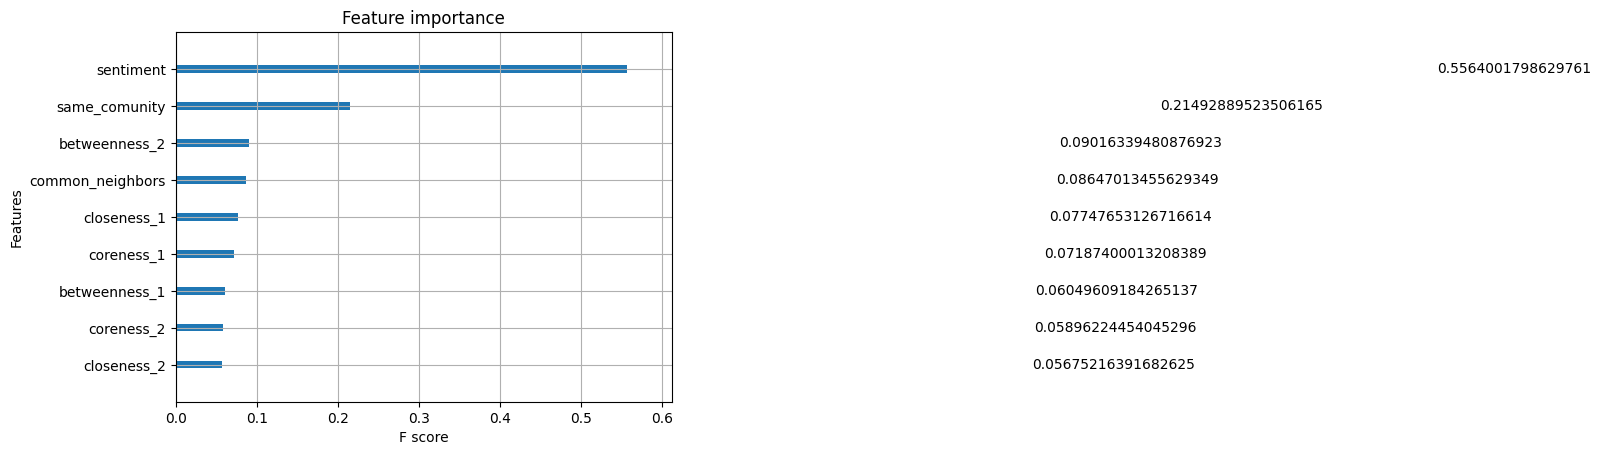

In [145]:
xgb.plot_importance(xg_reg, importance_type='gain', max_num_features=10)  
plt.show() #El aumento promedio en la métrica de rendimiento que se obtiene al usar una característica.

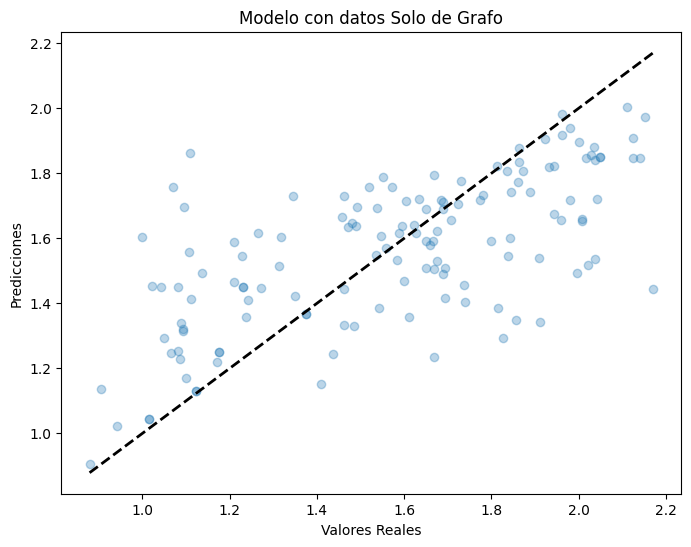

In [146]:
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_test_pred = xg_reg.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Modelo con datos Solo de Grafo')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal
plt.savefig('grafico_dispersión_solo_graph.png')  # Guardar la imagen

plt.show()

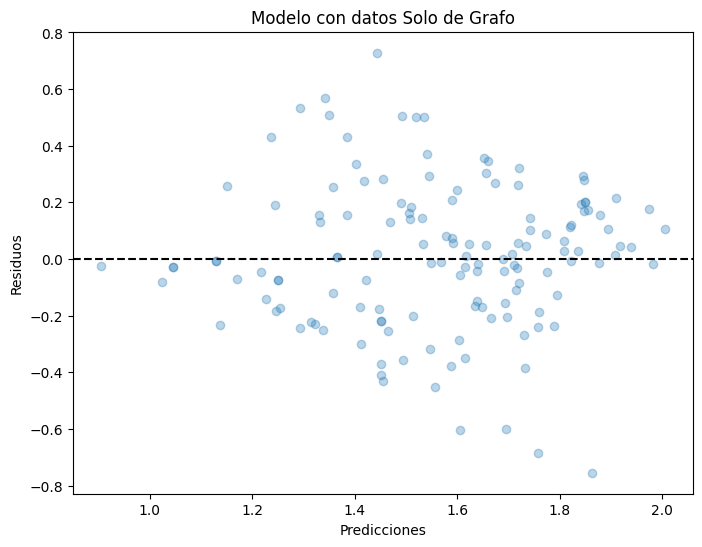

In [147]:
# Calcular residuos
residuals = y_test - y_test_pred

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Modelo con datos Solo de Grafo')
plt.axhline(y=0, color='k', linestyle='--')  # Línea horizontal en 0

plt.savefig('grafico_residuos_solo_graph.png')  # Guardar la imagen

plt.show()

# Solo datos tabulares

In [148]:

X = filtered_edgelist_df[['same_party', 'same_sector', 'same_region']]
#'eigenvector_1', 'eigenvector_2',
y = data['proportion_agreement']


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', subsample= 0.8, colsample_bytree=0.7, learning_rate=0.1,
                          max_depth=5, alpha=1, n_estimators=100, min_child_weight=4, gamma=0)

xg_reg.fit(X_train, y_train)


# Predecir en el conjunto de entrenamiento
y_train_pred = xg_reg.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Predecir en el conjunto de validación/prueba
y_test_pred = xg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE Entrenamiento: {train_rmse}")
print(f"RMSE Prueba: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE Entrenamiento: 0.24875635848082472
RMSE Prueba: 0.2538466128966913
MAE: 0.20960425400492208
R²: 0.4530964944524758


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [153]:
from sklearn.model_selection import cross_val_score
# Validación cruzada
cv_scores = cross_val_score(xg_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir scores negativos a positivos y calcular el RMSE
cv_rmse = np.sqrt(-cv_scores)

print(f"RMSE de Validación Cruzada: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

RMSE de Validación Cruzada: 0.3167 ± 0.1170


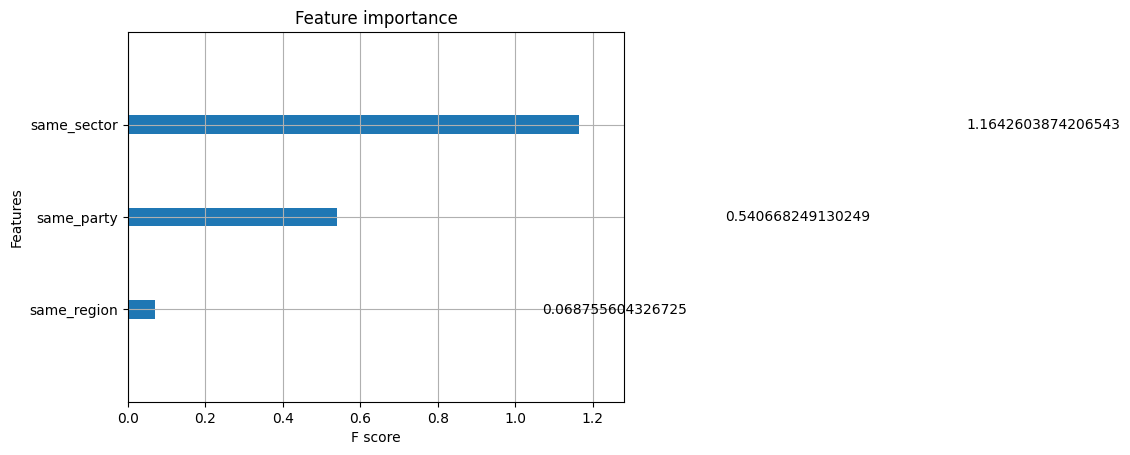

In [150]:
xgb.plot_importance(xg_reg, importance_type='gain', max_num_features=10)  
plt.show() #El aumento promedio en la métrica de rendimiento que se obtiene al usar una característica.

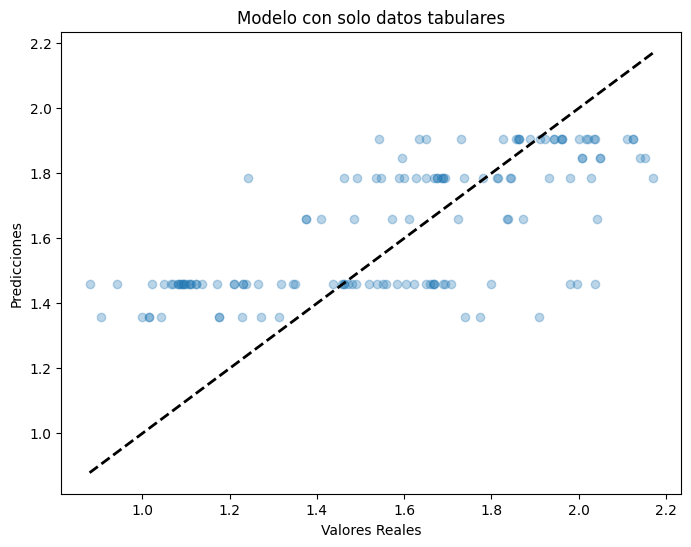

In [151]:
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_test_pred = xg_reg.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Modelo con solo datos tabulares')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal
plt.savefig('grafico_dispersión_modelo_tabular.png')  # Guardar la imagen

plt.show()

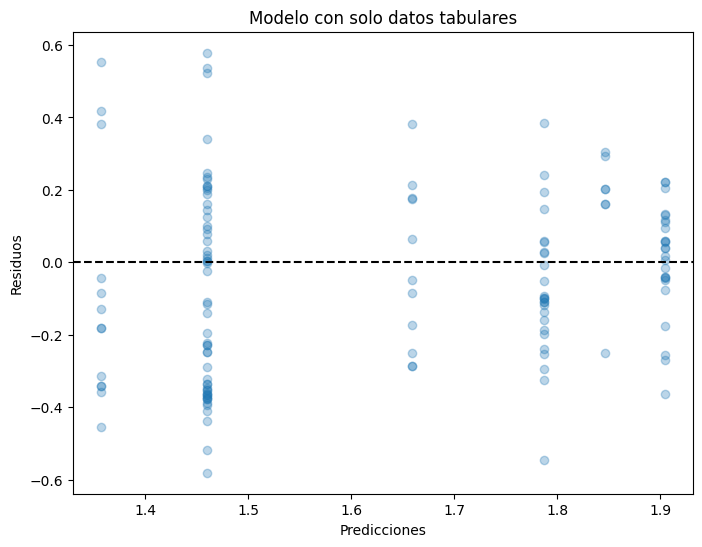

In [152]:
# Calcular residuos
residuals = y_test - y_test_pred

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Modelo con solo datos tabulares')
plt.axhline(y=0, color='k', linestyle='--')  # Línea horizontal en 0

plt.savefig('grafico_residuos_solo_tabular.png')  # Guardar la imagen

plt.show()

# Resultados


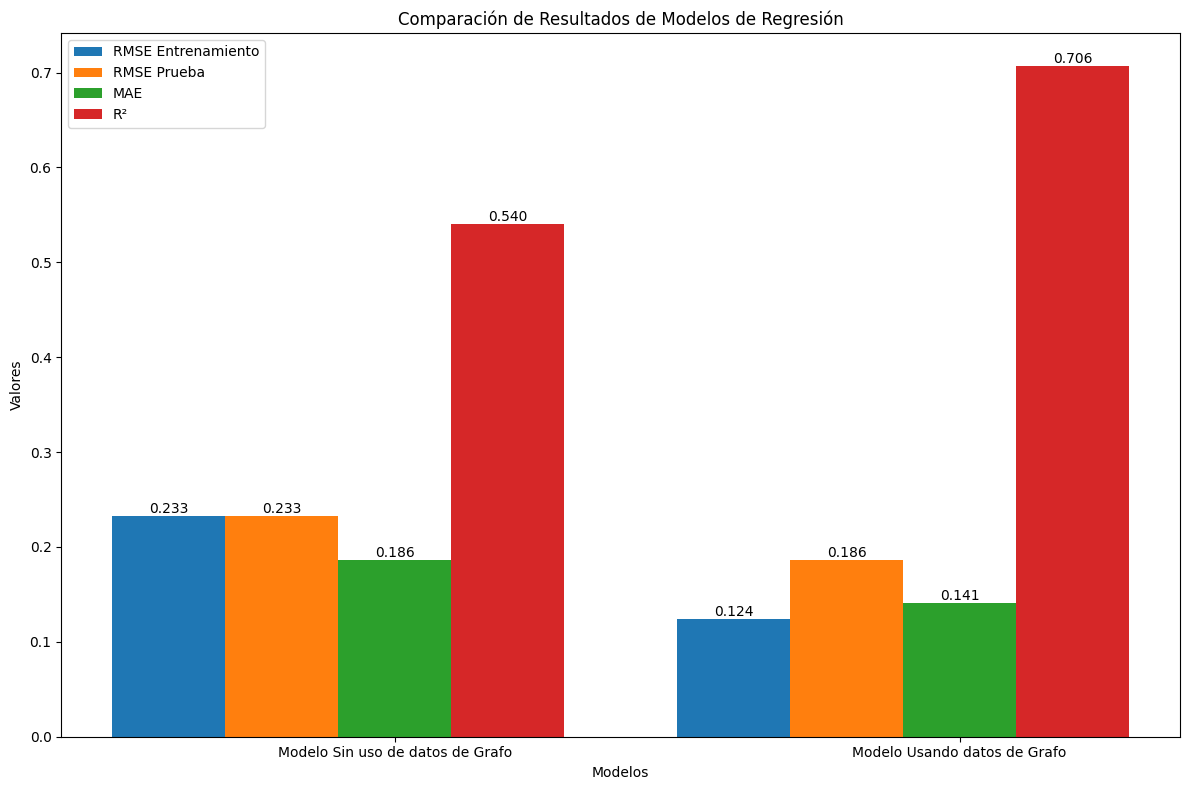

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de los dos modelos
model_names = ['Modelo Sin uso de datos de Grafo', 'Modelo Usando datos de Grafo']
rmse_train = [0.23280579058976555, 0.12419426490303488]
rmse_test = [0.23274316537310588, 0.18596390007067773]
mae = [0.1864668693801699, 0.1409883452613345]
r2 = [0.5402498979048536, 0.706488411616479]
rmse_cv = [0.3025, 0.2950]  

x = np.arange(len(model_names))  # La posición de las etiquetas en el eje x

# Ancho de las barras
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))

# Crear las barras
bar1 = ax.bar(x - width, rmse_train, width, label='RMSE Entrenamiento')
bar2 = ax.bar(x, rmse_test, width, label='RMSE Prueba')
bar3 = ax.bar(x + width, mae, width, label='MAE')
bar4 = ax.bar(x + 2*width, r2, width, label='R²')

# Añadir etiquetas y título
ax.set_xlabel('Modelos')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Resultados de Modelos de Regresión')
ax.set_xticks(x + width)
ax.set_xticklabels(model_names)
ax.legend()

# Añadir los valores arriba de las barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.3f}',
            ha='center',
            va='bottom'
        )

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)
add_value_labels(bar4)

# Mostrar la gráfica
plt.tight_layout()
plt.savefig('comparacion_modelos.png')  # Guardar la imagen
plt.show()


In [163]:
from IPython.display import Markdown

# Datos
features_dict = {
    'Modelo Predeterminado': ['same_party', 'same_sector', 'same_region', 'sentiment'],
    'Modelo con datos de Grafo': ['common_neighbors', 'closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'coreness_1', 'coreness_2', 'same_comunity', 'same_party', 'same_sector', 'same_region', 'sentiment'],
    'Modelo con solo datos de Grafo': ['common_neighbors', 'closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'coreness_1', 'coreness_2', 'same_comunity', 'sentiment'],
    'Modelo con solo datos tabulares': ['same_party', 'same_sector', 'same_region']
}

# Crear una tabla en formato Markdown
markdown_table = "| Modelo | Features |\n|---------|----------|\n" + \
    "\n".join([f"| {name} | {', '.join(features)} |" for name, features in features_dict.items()])

# Mostrar la tabla en formato Markdown
Markdown(markdown_table)


| Modelo | Features |
|---------|----------|
| Modelo Predeterminado | same_party, same_sector, same_region, sentiment |
| Modelo con datos de Grafo | common_neighbors, closeness_1, closeness_2, betweenness_1, betweenness_2, coreness_1, coreness_2, same_comunity, same_party, same_sector, same_region, sentiment |
| Modelo con solo datos de Grafo | common_neighbors, closeness_1, closeness_2, betweenness_1, betweenness_2, coreness_1, coreness_2, same_comunity, sentiment |
| Modelo con solo datos tabulares | same_party, same_sector, same_region |

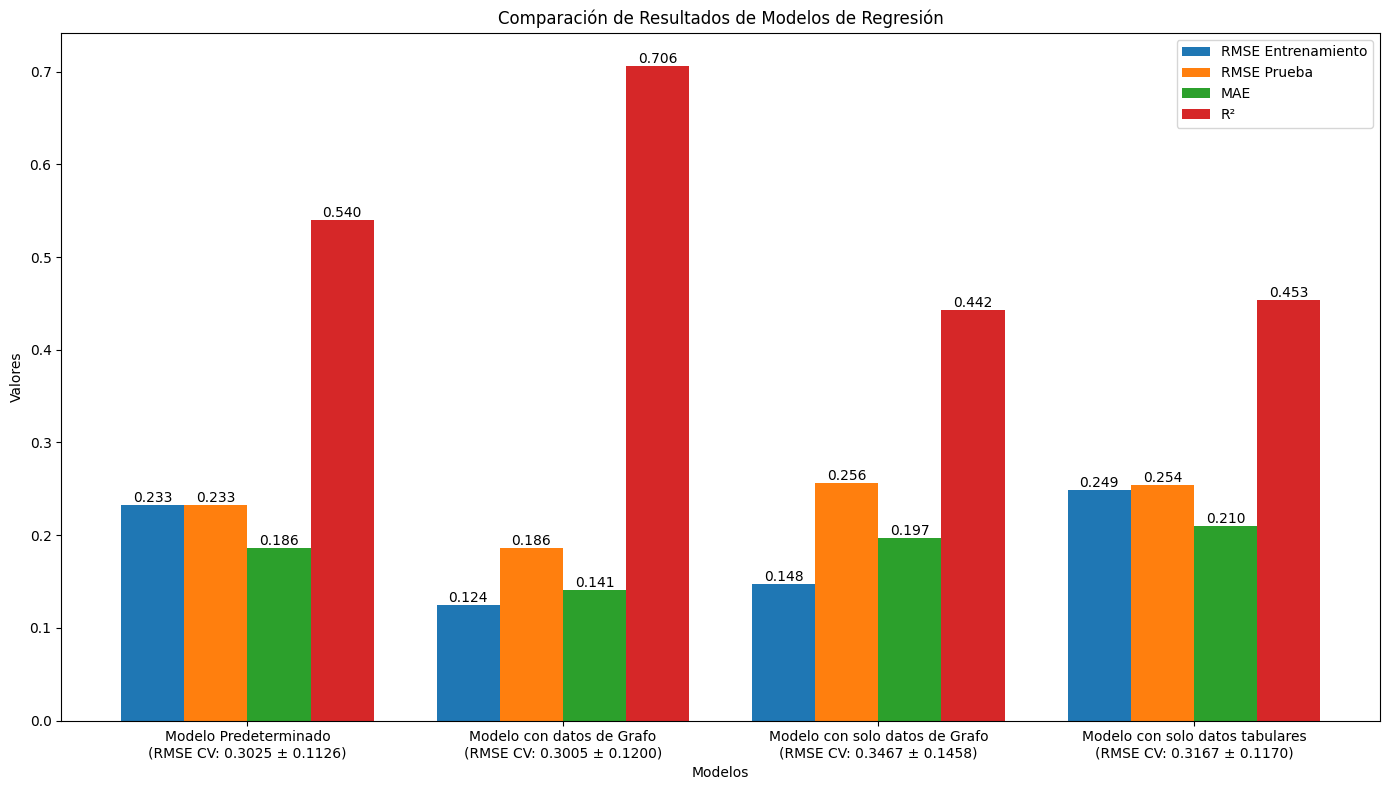

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de los cuatro modelos
model_names = [
    'Modelo Predeterminado\n(RMSE CV: 0.3025 ± 0.1126)',
    'Modelo con datos de Grafo\n(RMSE CV: 0.3005 ± 0.1200)',
    'Modelo con solo datos de Grafo\n(RMSE CV: 0.3467 ± 0.1458)',
    'Modelo con solo datos tabulares\n(RMSE CV: 0.3167 ± 0.1170)'
]

rmse_train = [0.23280579058976555, 0.12419426490303488, 0.14771876012645982, 0.24875635848082472]
rmse_test = [0.23274316537310588, 0.18596390007067773, 0.2563142527774752, 0.2538466128966913]
mae = [0.1864668693801699, 0.1409883452613345, 0.19693420748602194, 0.20960425400492208]
r2 = [0.5402498979048536, 0.706488411616479, 0.4424119285374485, 0.4530964944524758]

x = np.arange(len(model_names))  # La posición de las etiquetas en el eje x

# Ancho de las barras
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))

# Crear las barras
bar1 = ax.bar(x - 1.5*width, rmse_train, width, label='RMSE Entrenamiento')
bar2 = ax.bar(x - width/2, rmse_test, width, label='RMSE Prueba')
bar3 = ax.bar(x + width/2, mae, width, label='MAE')
bar4 = ax.bar(x + 1.5*width, r2, width, label='R²')

# Añadir etiquetas y título
ax.set_xlabel('Modelos')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Resultados de Modelos de Regresión')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Añadir los valores arriba de las barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.3f}',
            ha='center',
            va='bottom'
        )

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)
add_value_labels(bar4)

# Mostrar la gráfica
plt.tight_layout()
plt.savefig('comparacion_modelos_ampliado.png')  # Guardar la imagen
plt.show()


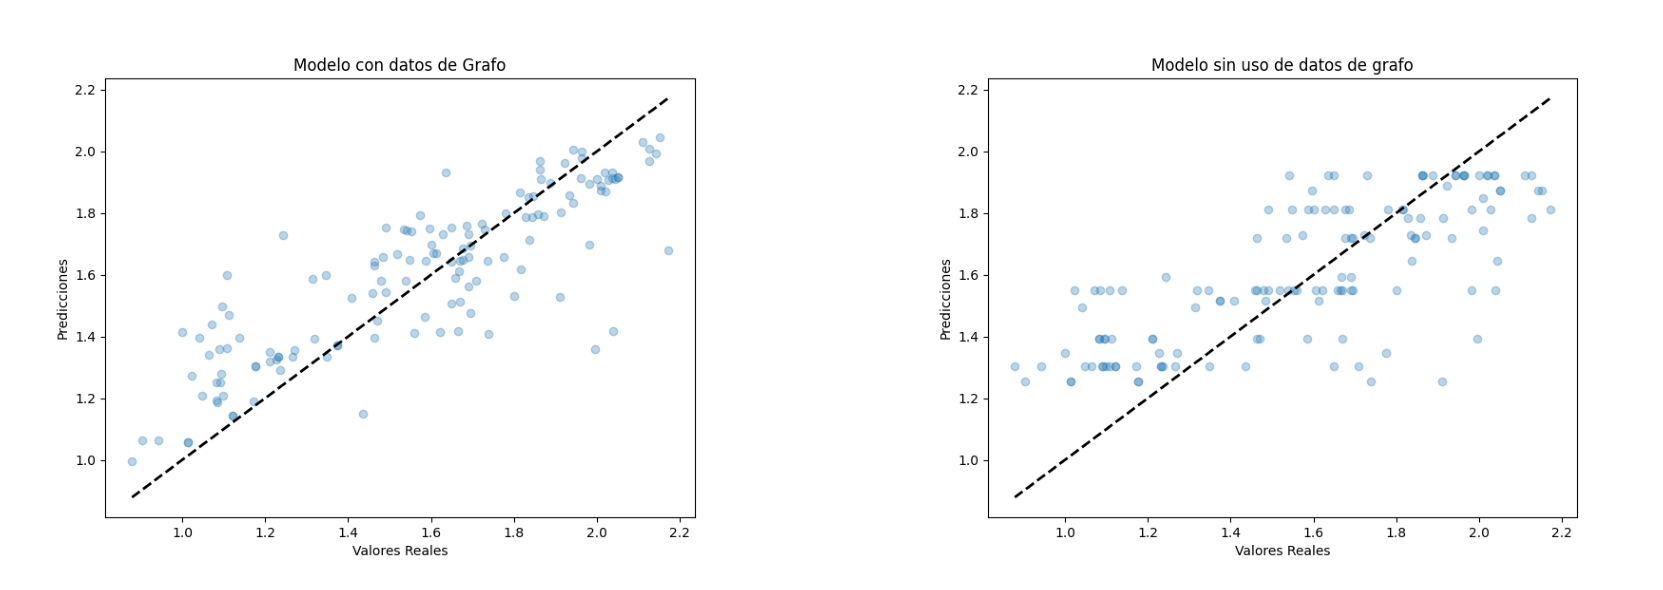

In [110]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes
img1 = mpimg.imread('grafico_dispersión_modelo_graph.png')
img2 = mpimg.imread('grafico_dispersión_modelo_sin_graph.png')

fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Ajusta el tamaño de la figura según necesites

# Mostrar las imágenes
axs[0].imshow(img1)
axs[0].axis('off')  # Ocultar los ejes

axs[1].imshow(img2)
axs[1].axis('off')  # Ocultar los ejes
plt.tight_layout()


plt.show()


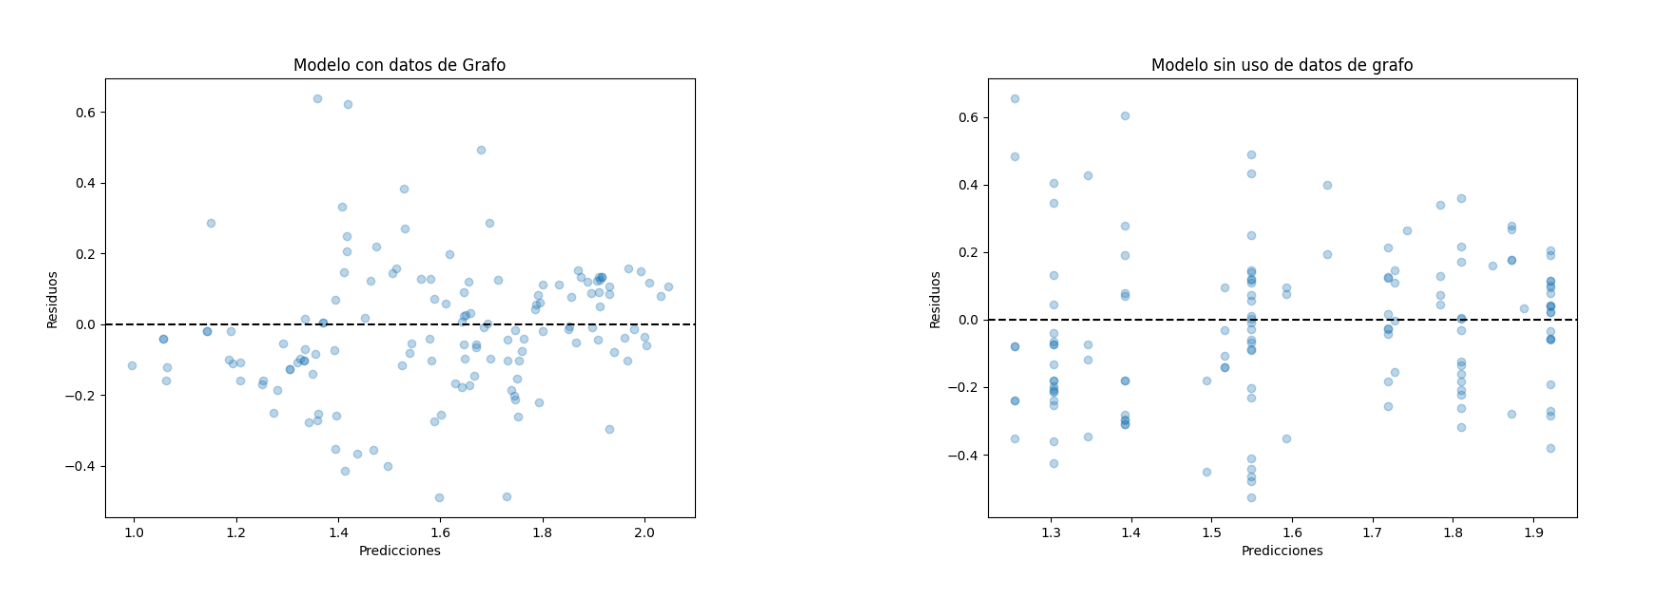

In [111]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes
img1 = mpimg.imread('grafico_residuos_modelo_graph.png')
img2 = mpimg.imread('grafico_residuos_modelo_sin_graph.png')

fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Ajusta el tamaño de la figura según necesites

# Mostrar las imágenes
axs[0].imshow(img1)
axs[0].axis('off')  # Ocultar los ejes

axs[1].imshow(img2)
axs[1].axis('off')  # Ocultar los ejes
plt.tight_layout()


plt.show()
